In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import seaborn as sns 
import plotly.express as px

In [2]:
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.isna().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [14]:
df.fillna(0, inplace=True)

In [15]:
df.isna().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin          False
Embarked       False
dtype: bool

In [16]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S


In [17]:
df.shape

(891, 12)

In [18]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,23.799293,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,17.596074,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,6.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,24.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [19]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [20]:
df['Age'] = df['Age'].apply(np.int64)
df['Age'].head()

0    22
1    38
2    26
3    35
4    35
Name: Age, dtype: int64

Oldest person in the titanic:

In [89]:
df['Age'].idxmax()

630

In [90]:
df.loc[630]

PassengerId                                     631
Survived                                          1
Pclass                                            1
Name           Barkworth, Mr. Algernon Henry Wilson
Sex                                            male
Age                                              80
SibSp                                             0
Parch                                             0
Ticket                                        27042
Fare                                           30.0
Cabin                                           A23
Embarked                                          S
Name: 630, dtype: object

Youngest person in the titanic:

In [91]:
df['Age'].idxmin()

5

In [92]:
df.loc[5]

PassengerId                   6
Survived                      0
Pclass                        3
Name           Moran, Mr. James
Sex                        male
Age                           0
SibSp                         0
Parch                         0
Ticket                   330877
Fare                     8.4583
Cabin                         0
Embarked                      Q
Name: 5, dtype: object

Amount ages:

In [93]:
age = df.value_counts('Age')
age

Age
0     184
24     31
30     27
28     27
22     27
     ... 
12      1
66      1
53      1
74      1
80      1
Name: count, Length: 71, dtype: int64

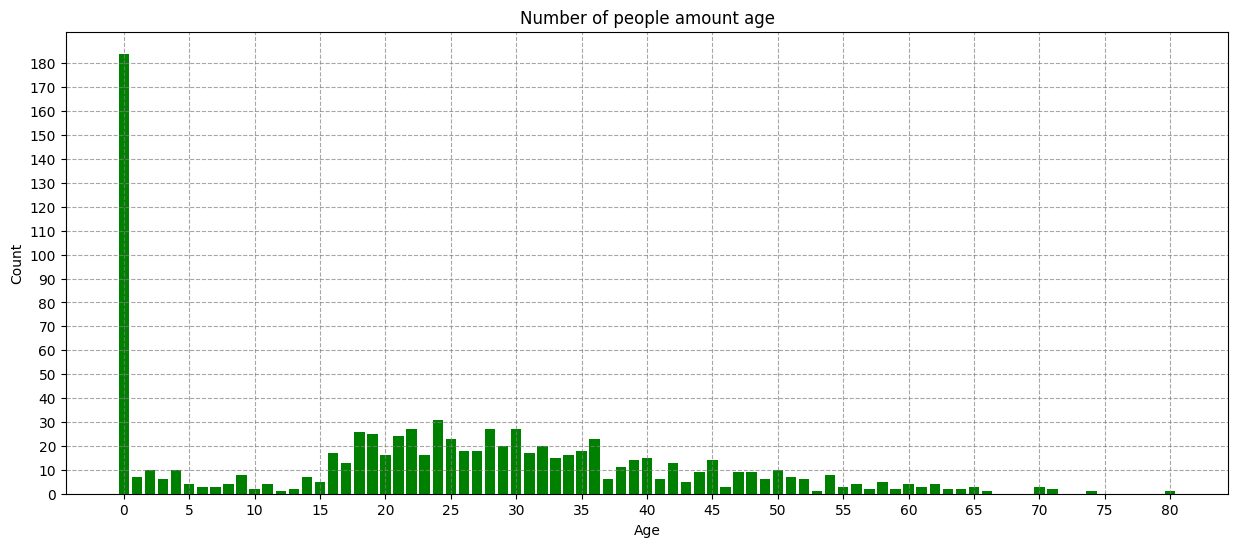

In [86]:
plt.figure(figsize=(15, 6))
plt.bar(age.index, age.values, color='green')
plt.title('Number of people amount age')
plt.ylabel('Count')
plt.xlabel('Age')
plt.yticks(np.arange(0, 185, step=10))

plt.gca().xaxis.set_major_locator(MultipleLocator(5))

plt.grid(True, color='gray',linestyle='--', alpha=0.7)

plt.show()


Amount of male and females:

In [87]:
sex_count = df.value_counts('Sex')
print(sex_count)

Sex
male      577
female    314
Name: count, dtype: int64


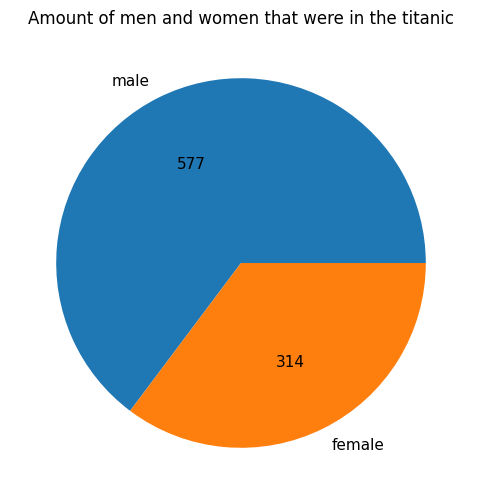

In [88]:
def m_w(val):
    total = sum(sex_count.values)
    res = val * total / 100
    return int(res) 

plt.figure(figsize=(9, 6))
plt.pie(sex_count, labels=sex_count.index, autopct=m_w, textprops={'fontsize': 11})
plt.title('Amount of men and women that were in the titanic')

plt.show()

In [94]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,0,S


In [114]:
s = df.value_counts('Survived')
print(s)

Survived
0    549
1    342
Name: count, dtype: int64
